In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
X=pd.read_csv("X_physio_scaled.csv")

In [3]:
X.head()

,Age,Gender,Place,Qua,F_Income,H_Issue,Alp_Before,D_Al_W,Aware_Ph,Rely_Phy,Phy_Bef,Phy_Eff,Why_Phy,Trv_Iss
0,0.176915,-1.014128,0.281474,-0.999376,-0.676596,-1.414485,-3.506268,-1.050484,0.531767,0.877755,1.173111,1.410705,0.247996,-1.038829
1,0.402466,-1.014128,0.518462,-0.999376,-0.358506,-1.414485,0.567371,0.564898,0.531767,0.877755,1.173111,1.410705,-1.002006,-1.038829
2,0.176915,-1.014128,-1.614436,-0.999376,1.974151,1.373653,0.567371,0.564898,0.531767,0.877755,1.173111,1.410705,-1.002006,-1.038829
3,0.222025,-1.014128,0.597458,0.279313,-0.146447,0.301293,0.567371,1.372589,0.531767,-1.472871,1.173111,-1.559513,1.497999,0.962622
4,-0.905728,-1.014128,0.281474,-0.999376,0.913852,0.944709,0.567371,1.372589,0.531767,-1.472871,1.173111,-1.559513,1.497999,0.962622


In [6]:
y=pd.read_csv("y_physio.csv")

In [7]:
y.head()

,Pref_Phy
0,1
1,1
2,1
3,0
4,0


In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(399, 14)
(100, 14)
(399, 1)
(100, 1)


In [10]:
classifiers = {
    "Logistic Regression": LogisticRegression(penalty='l2'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(criterion="entropy"),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(kernel='rbf')}
    


In [11]:
model1=classifiers["Logistic Regression"]
model2=classifiers["Decision Tree"]
model3=classifiers["Random Forest"]
model4=classifiers["K-Nearest Neighbors"]
model5=classifiers["Naive Bayes"]
model6=classifiers["Support Vector Machine"]

In [12]:
model1.fit(X_train,y_train)

C:\Users\Pattu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [13]:
y_pred_Logistic_1 = model1.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, y_pred_Logistic_1)
print("Accuracy:", accuracy)

Accuracy: 0.78


In [15]:
y_pred_Logistic_2 = model1.predict(X_train)

In [16]:
accuracy = accuracy_score(y_train, y_pred_Logistic_2)
print("Accuracy:", accuracy)

Accuracy: 0.8070175438596491


In [17]:
X_test.head()

,Age,Gender,Place,Qua,F_Income,H_Issue,Alp_Before,D_Al_W,Aware_Ph,Rely_Phy,Phy_Bef,Phy_Eff,Why_Phy,Trv_Iss
149,-0.229076,-1.014128,-1.298451,1.558002,-0.623581,0.515765,-1.469449,-0.242793,-1.880522,-1.472871,1.173111,-1.559513,0.247996,0.962622
467,1.936210,-1.014128,0.755451,-0.999376,-0.358506,0.515765,0.567371,0.564898,0.531767,0.877755,1.173111,1.410705,-1.002006,0.962622
294,-0.003526,-1.014128,-0.350496,0.279313,1.125912,-1.414485,0.567371,1.372589,-1.880522,-0.689329,-0.852434,-0.074404,0.247996,0.962622
381,-0.048636,0.986069,0.518462,-0.999376,-0.538757,0.515765,0.567371,-1.050484,0.531767,0.877755,-0.852434,-2.302068,0.247996,-1.038829
321,-1.492160,-1.014128,0.123481,1.558002,0.065613,-0.771068,0.567371,-1.050484,0.531767,0.877755,1.173111,1.410705,-1.002006,0.962622


In [18]:
y_test.head(10)

,Pref_Phy
149,0
467,1
294,0
381,1
321,1
306,1
66,1
495,0
127,1
70,1


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
cm = confusion_matrix(y_test, y_pred_Logistic_1)
print("Confusion matrix is \n",cm)


Confusion matrix is 
 [[40 11]
 [11 38]]


In [21]:
report = classification_report(y_test, y_pred_Logistic_1)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        51
           1       0.78      0.78      0.78        49

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.78      0.78      0.78       100



In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [23]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_Logistic_1)

# Calculate the AUC
auc = roc_auc_score(y_test, y_pred_Logistic_1)

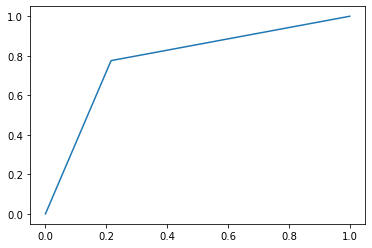

In [24]:
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# ##################################################

In [26]:
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred_Decision_1 = model2.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred_Decision_1)
print("Accuracy:", accuracy)

Accuracy: 0.99


In [29]:
y_pred_Decision_2 = model2.predict(X_train)

In [30]:
accuracy = accuracy_score(y_train, y_pred_Decision_2)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [31]:
# Access the root node of the decision tree
root_node = model2.tree_

# Print the root node
print("Root Node:", root_node)

Root Node: <sklearn.tree._tree.Tree object at 0x0AD87870>


In [32]:
cm1 = confusion_matrix(y_test, y_pred_Decision_1)
print("Confusion matrix is \n",cm1)

Confusion matrix is 
 [[51  0]
 [ 1 48]]


In [33]:
report1 = classification_report(y_test,y_pred_Decision_1)

print("Classification Report:")
print(report1)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.98      0.99        49

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



# #######################################################

In [34]:
model3.fit(X_train,y_train)

<ipython-input-34-222771e4f770>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy')

In [35]:
y_pred_Random_1 = model3.predict(X_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred_Random_1)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [37]:
y_pred_Random_2 = model3.predict(X_train)

In [38]:
accuracy = accuracy_score(y_train, y_pred_Random_2)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [39]:
num_trees = len(model3.estimators_)
print("Number of decision trees in the Random Forest: ", num_trees)

Number of decision trees in the Random Forest:  100


In [40]:
for i, tree in enumerate(model3.estimators_):
    print("Max depth of tree ", i+1, " is ", tree.max_depth)

Max depth of tree  1  is  None
Max depth of tree  2  is  None
Max depth of tree  3  is  None
Max depth of tree  4  is  None
Max depth of tree  5  is  None
Max depth of tree  6  is  None
Max depth of tree  7  is  None
Max depth of tree  8  is  None
Max depth of tree  9  is  None
Max depth of tree  10  is  None
Max depth of tree  11  is  None
Max depth of tree  12  is  None
Max depth of tree  13  is  None
Max depth of tree  14  is  None
Max depth of tree  15  is  None
Max depth of tree  16  is  None
Max depth of tree  17  is  None
Max depth of tree  18  is  None
Max depth of tree  19  is  None
Max depth of tree  20  is  None
Max depth of tree  21  is  None
Max depth of tree  22  is  None
Max depth of tree  23  is  None
Max depth of tree  24  is  None
Max depth of tree  25  is  None
Max depth of tree  26  is  None
Max depth of tree  27  is  None
Max depth of tree  28  is  None
Max depth of tree  29  is  None
Max depth of tree  30  is  None
Max depth of tree  31  is  None
Max depth of tree

In [41]:
print(model3.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# ###################################################

In [42]:
model4.fit(X_train,y_train)

C:\Users\Pattu\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [43]:
y_pred_KNeighbors_1 = model4.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred_KNeighbors_1)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [45]:
y_pred_KNeighbors_2 = model4.predict(X_train)

In [46]:
accuracy = accuracy_score(y_train, y_pred_KNeighbors_2)
print("Accuracy:", accuracy)

Accuracy: 0.9974937343358395


In [47]:
print(model4.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


# ##############################################

In [48]:
model5.fit(X_train,y_train)

C:\Users\Pattu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [49]:
y_pred_GaussianNB_1 = model5.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test, y_pred_GaussianNB_1)
print("Accuracy:", accuracy)

Accuracy: 0.78


In [51]:
y_pred_GaussianNB_2 = model5.predict(X_train)

In [52]:
accuracy = accuracy_score(y_train, y_pred_GaussianNB_2)
print("Accuracy:", accuracy)

Accuracy: 0.8045112781954887


In [53]:
model5.predict_proba(X_test[:10])

array([[9.99969725e-01, 3.02753707e-05],
       [5.98671965e-04, 9.99401328e-01],
       [9.99540304e-01, 4.59696335e-04],
       [3.39121647e-01, 6.60878353e-01],
       [2.09586612e-03, 9.97904134e-01],
       [1.24309089e-02, 9.87569091e-01],
       [3.05704952e-01, 6.94295048e-01],
       [2.77863303e-01, 7.22136697e-01],
       [7.71389088e-01, 2.28610912e-01],
       [1.90057807e-04, 9.99809942e-01]])

In [54]:
X_test.head(10)

,Age,Gender,Place,Qua,F_Income,H_Issue,Alp_Before,D_Al_W,Aware_Ph,Rely_Phy,Phy_Bef,Phy_Eff,Why_Phy,Trv_Iss
149,-0.229076,-1.014128,-1.298451,1.558002,-0.623581,0.515765,-1.469449,-0.242793,-1.880522,-1.472871,1.173111,-1.559513,0.247996,0.962622
467,1.936210,-1.014128,0.755451,-0.999376,-0.358506,0.515765,0.567371,0.564898,0.531767,0.877755,1.173111,1.410705,-1.002006,0.962622
294,-0.003526,-1.014128,-0.350496,0.279313,1.125912,-1.414485,0.567371,1.372589,-1.880522,-0.689329,-0.852434,-0.074404,0.247996,0.962622
381,-0.048636,0.986069,0.518462,-0.999376,-0.538757,0.515765,0.567371,-1.050484,0.531767,0.877755,-0.852434,-2.302068,0.247996,-1.038829
321,-1.492160,-1.014128,0.123481,1.558002,0.065613,-0.771068,0.567371,-1.050484,0.531767,0.877755,1.173111,1.410705,-1.002006,0.962622
306,-0.589957,-1.014128,-1.298451,0.279313,1.550031,0.515765,0.567371,-1.050484,0.531767,0.877755,1.173111,0.668150,0.247996,-1.038829
66,1.214448,-1.014128,-0.587485,-0.999376,-0.252476,0.086820,0.567371,1.372589,0.531767,0.094213,-0.852434,-0.074404,0.247996,-1.038829
495,2.206871,0.986069,-0.824474,1.558002,-0.909862,-1.414485,0.567371,-1.050484,0.531767,0.877755,-0.852434,-0.074404,-1.002006,0.962622
127,0.086695,0.986069,-1.140459,-0.999376,-0.305491,0.944709,-1.469449,0.564898,0.531767,-1.472871,-0.852434,-0.074404,-1.002006,0.962622
70,-1.401940,-1.014128,-1.061462,-0.999376,0.171643,-0.985540,0.567371,0.564898,0.531767,0.877755,1.173111,1.410705,-1.002006,-1.038829


# #############################################

In [55]:
model6.fit(X_train,y_train)

C:\Users\Pattu\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [56]:
y_pred_SVC_1 = model6.predict(X_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred_SVC_1)
print("Accuracy:", accuracy)

Accuracy: 0.98


In [58]:
y_pred_SVC_2 = model6.predict(X_train)

In [59]:
accuracy = accuracy_score(y_train, y_pred_SVC_2)
print("Accuracy:", accuracy)

Accuracy: 0.9949874686716792


In [60]:
print("Value of C parameter:", model6.C)
print("Kernel function used:", model6.kernel)
print("Support vectors:", model6.support_vectors_)
print("Number of support vectors for each class:", model6.n_support_)

Value of C parameter: 1.0
Kernel function used: rbf
Support vectors: [[ 2.11665078  0.98606897 -0.82447371 ... -0.07440427 -1.00200602
   0.9626219 ]
 [ 0.89867709 -1.01412784  1.30842458 ... -0.07440427 -1.00200602
  -1.03882947]
 [-0.36440673 -1.01412784 -1.21945487 ... -0.07440427  0.24799649
  -1.03882947]
 ...
 [ 1.75576969 -1.01412784 -1.06146241 ... -0.07440427  0.24799649
   0.9626219 ]
 [ 1.84598996 -1.01412784  0.75545095 ...  1.41070491 -1.00200602
   0.9626219 ]
 [-0.72528783  0.98606897 -1.06146241 ... -0.07440427  1.497999
   0.9626219 ]]
Number of support vectors for each class: [88 85]


In [61]:
margin_width = 2/np.linalg.norm(model6.coef_)
print("Margin width:", margin_width)

AttributeError: coef_ is only available when using a linear kernel

# ###################################################